# Exercise: Central Limit Theorem

In this exercise I will show what is the Central Limit Theorem and how it applies 

# Galton board
[Galton board](https://en.wikipedia.org/wiki/Galton_board) board also known as the Galton box or quincunx or bean machine, is a device invented by Sir Francis Galton to demonstrate the central limit theorem

<img src="img/galton.gif" alt="drawing" width="400"/>

Let's simulate and make it ourselves (pictures from [3Blue1Brown](https://www.3blue1brown.com/) )



Assume that at each layer a particle choses either to go left or right ($X_i = -1, 1$) with 50 % probability


<img src="img/galton1.png" alt="drawing" width="500"/>



And after $N$-layers The total sum is equal to $X_{1} + X_{2}+...+ X_{N}$

<img src="img/galton2.png" alt="drawing" width="500"/>



Pascal triangle probabilities

<img src="img/galton3.png" alt="drawing" width="500"/>

...

<img src="img/galton4.png" alt="drawing" width="500"/>

# Part 0: Generate a random numbers with a value of -1 or 1

In [1]:
for (int i = 0; i < 5; i++) {
    TRandom3 rand(0);
    double result = rand.Integer(2); // returns a random number 0 or 1 
    double converted_result = 2*result - 1; // convert from (0,1) to (-1,1)
    cout << "Random number: " << result << " ->  converted value " << converted_result << endl;
}


Random number: 1 ->  converted value 1
Random number: 1 ->  converted value 1
Random number: 0 ->  converted value -1
Random number: 0 ->  converted value -1
Random number: 1 ->  converted value 1


### Part 1: Initialize number of samples, layers and define a histogram

Let's choose number of layers $N = 5$ (layers) and test 1000 Events

In [2]:
int nLayers = 5;
int nEvents = 1000;

Create First an empty histogram with $N+1$ bins with range $[-N,+N]$

In [3]:
TH1D * galton_board = new TH1D("galton_board","",
    nLayers+1,-nLayers-0.5 ,nLayers+0.5); // nLayers+1 bins, 
    //x range is from -nLayers-0.5 to nLayers+0.5 to include bin centers
    

### Part 2: Fill the histogram with a sum $X_{sum}$ is equal to $X_{1} + X_{2}+...+ X_{N}$, where $X_{i}$    is "-1" or "+1"

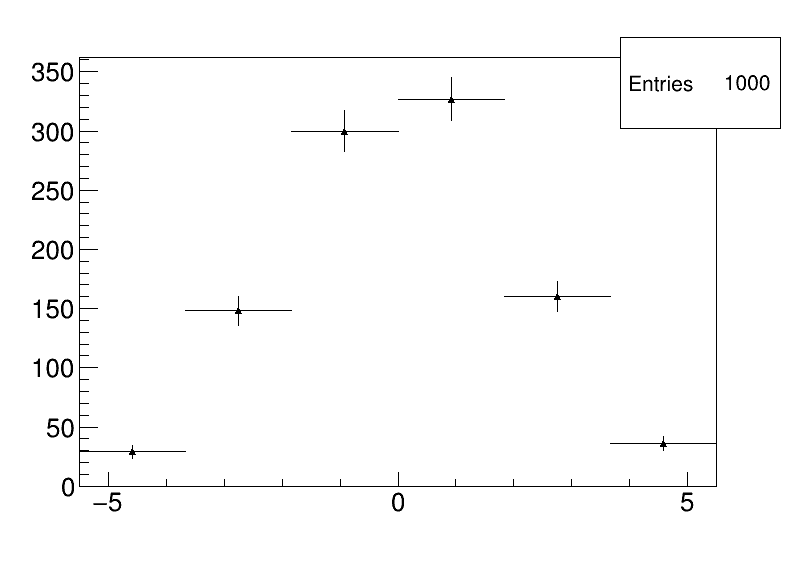

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [4]:
TRandom3 rand(0);
galton_board->Reset();
// initialize with zero to have a random seed
for (int iEvent = 0; iEvent < nEvents; ++iEvent) { // loop over events
    double X_sum = 0;
    //X_sum = rand.Integer(nLayers)-0.5*(nLayers-1); // what if we want to start from a random position and not central point
    for (int iLayer = 0; iLayer < nLayers; ++iLayer) { 
        double result = rand.Integer(2); // returns a random number 0 or 1 
        double converted_result = 2*result - 1; // convert from (0,1) to (-1,1)
        X_sum += converted_result;
    }
    galton_board->Fill(X_sum);        
}
galton_board->Draw();
gPad->Draw();

### Let's draw it with a pretty style and labels

In [5]:
%jsroot on
galton_board->SetTitle("Galton board; X_{sum}; Entries");
gPad->Draw();


In [6]:
gPad->SaveAs("galton_board_hist.pdf");

Info in <TCanvas::Print>: pdf file galton_board_hist.pdf has been created


### Part 3: Fit the obtained histogram with a Gaussian function

we perform now a fit with a Gaussian distribution and get its mean and sigma

In [7]:
// declare here some variables which will be used afterwards
TF1 * fitfunc = NULL; 

Fit now the histogram using the Fit method in ROOT. By default the least-square method is used. 
For likelihood fits we need to use the option "L", for Pearson chi-square (expected error) , option "P".

Use also  option "S" to create a TFitResult object that is returned to the user.
To compute the error using MINOS, use the "E" option


In [8]:
fitfunc = new TF1("fitfunc","gaus",-nLayers,nLayers);
fitfunc->SetLineColor(kBlue);


TFitResultPtr res; 

res=galton_board->Fit(fitfunc , "S E");
fitfunc->Draw("same");

gPad->SetLogy(0);
gStyle->SetOptFit(1111);

gPad->Draw();


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =     0.823799
NDf                       =            3
Edm                       =  3.85429e-09
NCalls                    =           63
Constant                  =       347.14   +/-   13.7794       -13.7129     +13.8455      (Minos) 
Mean                      =    0.0973878   +/-   0.0693589     -0.0693849   +0.0693869    (Minos) 
Sigma                     =      2.12116   +/-   0.0543242     -0.0538951   +0.0548501    (Minos)  	 (limited)


Get the correlation matrix of the fit from the TFitResult class and print it 

In [9]:
res->Print();
auto corrMatrix = res->GetCorrelationMatrix(); 
corrMatrix.Print(); 
std::cout  << "Gaussian sigma = " << fitfunc->GetParameter("Sigma") << "  +/- " << fitfunc->GetParError(fitfunc->GetParNumber("Sigma")) << std::endl;

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =     0.823799
NDf                       =            3
Edm                       =  3.85429e-09
NCalls                    =           63
Constant                  =       347.14   +/-   13.7794       -13.7129     +13.8455      (Minos) 
Mean                      =    0.0973878   +/-   0.0693589     -0.0693849   +0.0693869    (Minos) 
Sigma                     =      2.12116   +/-   0.0543242     -0.0538951   +0.0548501    (Minos)  	 (limited)

3x3 matrix is as follows

     |      0    |      1    |      2    |
--------------------------------------------
   0 |          1   5.214e-05      -0.604 
   1 |  5.214e-05           1    0.003876 
   2 |     -0.604    0.003876           1 

Gaussian sigma = 2.12116  +/- 0.0543242


Repeat the operation above by increasing $N$ layers to a larger value (e.g. $N=100$). For the Central Limit Theorem as $N$ is increased the obtained distribution will converge to a Gaussian. 

## Remark

<details>
  <summary>Can anyone guess how to calculate the sigma analytically?</summary>

 It is $\sqrt{N_{layers}}$

Since if $X$ and $Y$ are independent, their variance $ Var(X+Y) = Var (X) + Var(Y) $ 

( e.g. $X$ is the first layer, $Y$ is the second and so on)

$ Var(X_{1}+X_{2}+...+X_{N}) =N \,Var(X_{1}) $ 

and $\sigma = \sqrt{Var()}$

</details>



